In [39]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Jupyter Notebook for ML pipeline and training

This notebook is for me to directly interface with my code and make it easier to see it's results at a glance.

In [40]:
from pyedflib import highlevel 
import pandas as pd 
import os
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [41]:
print(f"We are current in {os.getcwd()}")

We are current in /mnt/windows-c/University Work/final-year-project-code/notebooks


### Constants

In [ ]:
# Data Paths 
DATA_BASEPATH = r"../eeg-data/files"

# This list is the data corresponding to each volunteer in the study. The index n represents the (n-1)th patient
DATA_FILES = [f'{DATA_BASEPATH}/{volunteer_file}' for volunteer_file in os.listdir(DATA_BASEPATH)[5:]]

### Functions

In [ ]:
# This function takes a user number and returns a dictionary of the user's data files 
def get_data_dictionary(user_index):
    actual_index = user_index - 1
    parent_dir = DATA_FILES[actual_index]
    user_files = os.listdir(parent_dir)
    
    # Filtering out the .event files. 
    filtered_files = [file for file in user_files if not file.endswith('.event')]
    patient_files = { f'task_{idx}' : f'{parent_dir}/{filtered_files[idx]}' for idx in range(len(filtered_files))}

    return patient_files

{'task_0': '../eeg-data/files/S001/S001R01.edf',
 'task_1': '../eeg-data/files/S001/S001R02.edf',
 'task_2': '../eeg-data/files/S001/S001R03.edf',
 'task_3': '../eeg-data/files/S001/S001R04.edf',
 'task_4': '../eeg-data/files/S001/S001R05.edf',
 'task_5': '../eeg-data/files/S001/S001R06.edf',
 'task_6': '../eeg-data/files/S001/S001R07.edf',
 'task_7': '../eeg-data/files/S001/S001R08.edf',
 'task_8': '../eeg-data/files/S001/S001R09.edf',
 'task_9': '../eeg-data/files/S001/S001R10.edf',
 'task_10': '../eeg-data/files/S001/S001R11.edf',
 'task_11': '../eeg-data/files/S001/S001R12.edf',
 'task_12': '../eeg-data/files/S001/S001R13.edf',
 'task_13': '../eeg-data/files/S001/S001R14.edf'}

### Actual Code

In [ ]:
signals, signal_headers, headers = highlevel.read_edf(f'{DATA_FILES[0]}/')

OSError: ../eeg-data/files/S001: a read error occurred

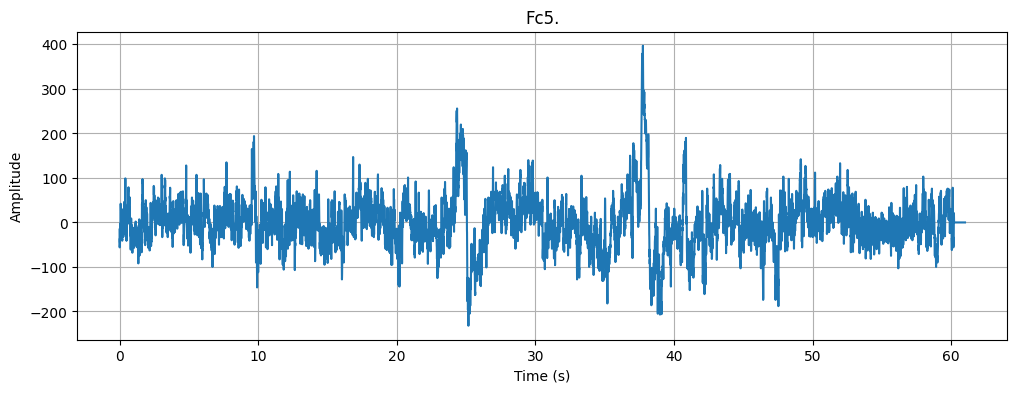

In [ ]:
channel = 0
signal = signals[channel]
fs = signal_headers[channel]['sample_frequency']
duration = len(signal) / fs
time = np.linspace(0, duration, len(signal))

plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(signal_headers[channel]['label'])
plt.grid(True)
plt.show()

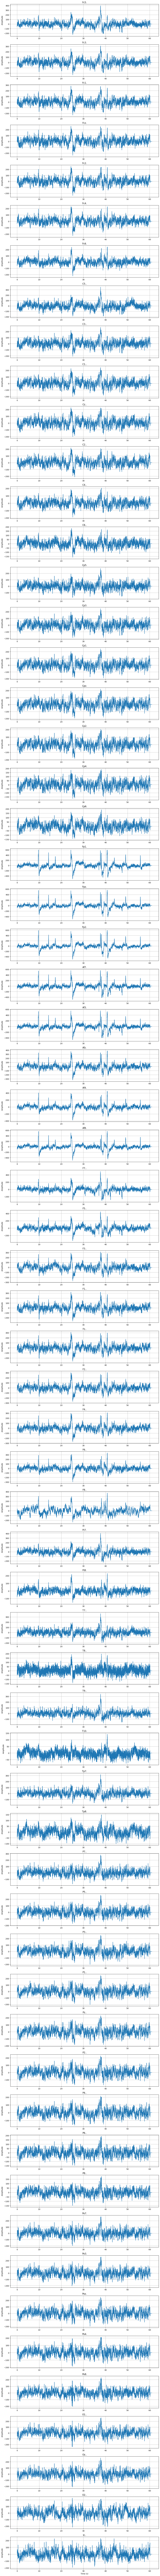

In [ ]:
n_channels = len(signals)
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 3*n_channels))

for i in range(n_channels):
    signal = signals[i]
    fs = signal_headers[i]['sample_frequency']
    time = np.linspace(0, len(signal)/fs, len(signal))
    
    ax = axes[i] if n_channels > 1 else axes
    ax.plot(time, signal)
    ax.set_ylabel('Amplitude')
    ax.set_title(signal_headers[i]['label'])
    ax.grid(True)

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()